In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from scrapp_refacto import *
movies

,Titre,Année,Score,Réalisateur,Votes,Recette,Genre,Durée
0,Les Évadés,1994,9.3,[Frank Darabont],2386826,"28,341,469",[Drama],142
1,Le parrain,1972,9.2,[Francis Ford Coppola],1654244,"134,966,411","[Crime, Drama]",175
2,The Dark Knight : Le Chevalier noir,2008,9.0,[Christopher Nolan],2349926,"534,858,444","[Action, Crime, Drama]",152
3,"Le parrain, 2ème partie",1974,9.0,[Francis Ford Coppola],1150704,"57,300,000","[Crime, Drama]",202
4,12 Hommes en colère,1957,9.0,[Sidney Lumet],704576,"4,360,000","[Crime, Drama]",96
...,...,...,...,...,...,...,...,...
245,Mr. Smith au sénat,1939,8.1,[Frank Capra],108523,"9,600,000","[Comedy, Drama]",129
246,Autant en emporte le vent,1939,8.1,"[Victor Fleming, George Cukor, Sam Wood]",294168,"198,676,459","[Drama, History, Romance]",238
247,New York - Miami,1934,8.1,[Frank Capra],95816,"4,360,000","[Comedy, Romance]",105
248,La passion de Jeanne d'Arc,1928,8.1,[Carl Theodor Dreyer],49029,"21,877","[Biography, Drama, History]",110


In [3]:
movies.Titre = movies.Titre.astype(str).astype(str)
movies.Année = movies.Année.astype(str).astype(int)
movies.Score = movies.Score.astype(str).astype(float)
movies.Réalisateur = movies.Réalisateur.astype(str).astype(str)
movies.Votes = movies.Votes.astype(str).astype(int)
movies.Recette = movies.Recette.astype(str)
movies.Recette = movies.Recette.apply(lambda x: x.replace(",", ""))
movies.Recette = movies.Recette.astype(str).astype(int)
movies.isnull().sum(axis=0)


Titre          0
Année          0
Score          0
Réalisateur    0
Votes          0
Recette        0
Genre          0
Durée          0
dtype: int64

In [4]:
#movies = movies.convert_dtypes()
movies['Durée'] = movies['Durée'].astype(int)
movies.dtypes

Titre           object
Année            int64
Score          float64
Réalisateur     object
Votes            int64
Recette          int64
Genre           object
Durée            int64
dtype: object

In [5]:
movies['Réalisateur'][249][0]

'['

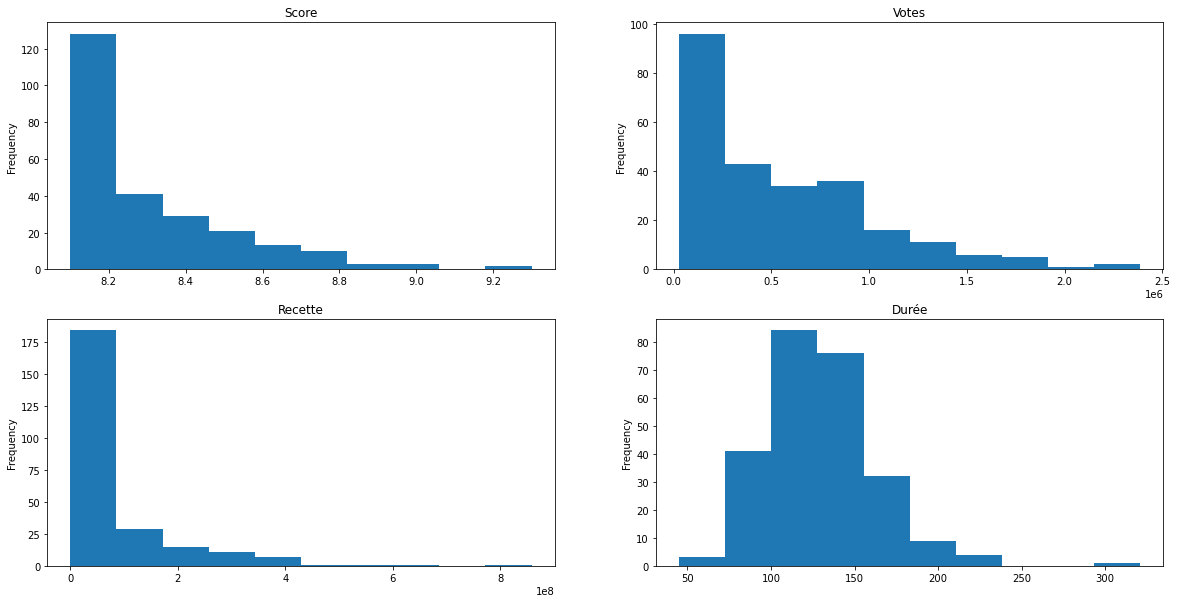

In [6]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

movies['Score'].plot(kind='hist', bins=10, ax=ax[0,0], title='Score')
movies['Votes'].plot(kind='hist', bins=10, ax=ax[0,1], title='Votes')
movies['Recette'].plot(kind='hist', bins=10, ax=ax[1,0], title='Recette')
movies['Durée'].plot(kind='hist', bins=10, ax=ax[1,1], title='Durée');

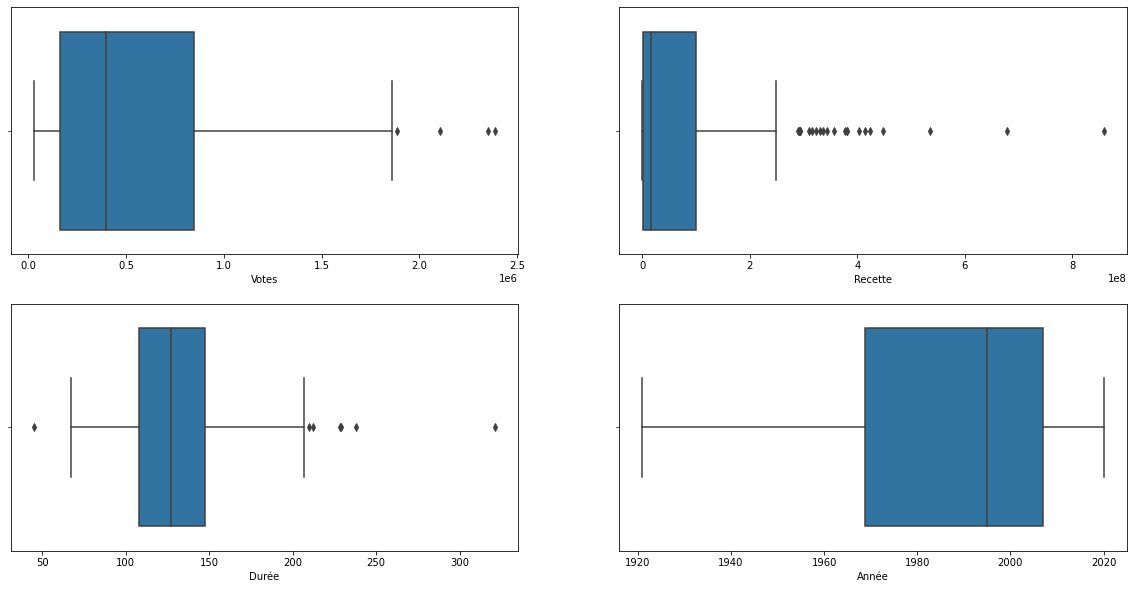

In [7]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

sns.boxplot(x=movies['Votes'], ax=ax[0,0])
sns.boxplot(x=movies['Recette'], ax=ax[0,1])
sns.boxplot(x=movies['Durée'], ax=ax[1,0])
sns.boxplot(x=movies['Année'], ax=ax[1,1]);

/home/juliecharrier/anaconda3/envs/imdb-scrapp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

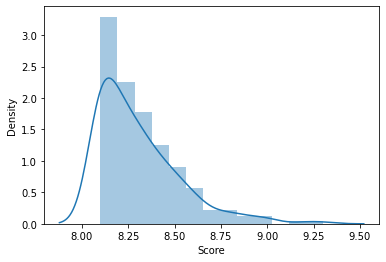

In [8]:
sns.distplot(movies['Score'])

/home/juliecharrier/anaconda3/envs/imdb-scrapp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juliecharrier/anaconda3/envs/imdb-scrapp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juliecharrier/anaconda3/envs/imdb-scrapp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

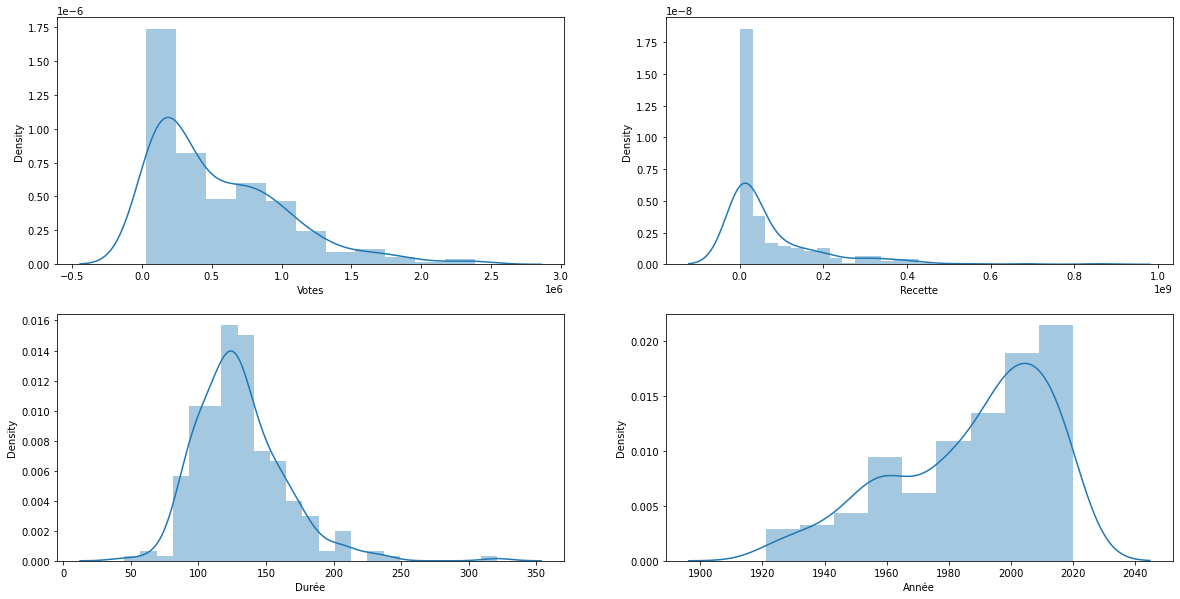

In [9]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

sns.distplot(movies['Votes'], ax=ax[0,0])
sns.distplot(movies['Recette'], ax=ax[0,1])
sns.distplot(movies['Durée'], ax=ax[1,0])
sns.distplot(movies['Année'], ax=ax[1,1]);

In [10]:
movies.describe()

,Année,Score,Votes,Recette,Durée
count,250.000000,250.000000,2.500000e+02,2.500000e+02,250.000000
mean,1987.392000,8.303600,5.486508e+05,7.503668e+07,130.520000
std,24.883954,0.221955,4.755127e+05,1.226014e+08,32.848221
min,1921.000000,8.100000,2.810200e+04,0.000000e+00,45.000000
25%,1968.750000,8.100000,1.610750e+05,1.051812e+06,108.250000
50%,1995.000000,8.200000,3.996430e+05,1.635978e+07,127.000000
75%,2007.000000,8.400000,8.474380e+05,1.004006e+08,147.750000
max,2020.000000,9.300000,2.386826e+06,8.583730e+08,321.000000


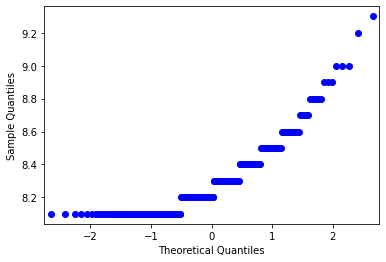

In [11]:
import statsmodels.api as sm

sm.qqplot(movies['Score'])
plt.show()

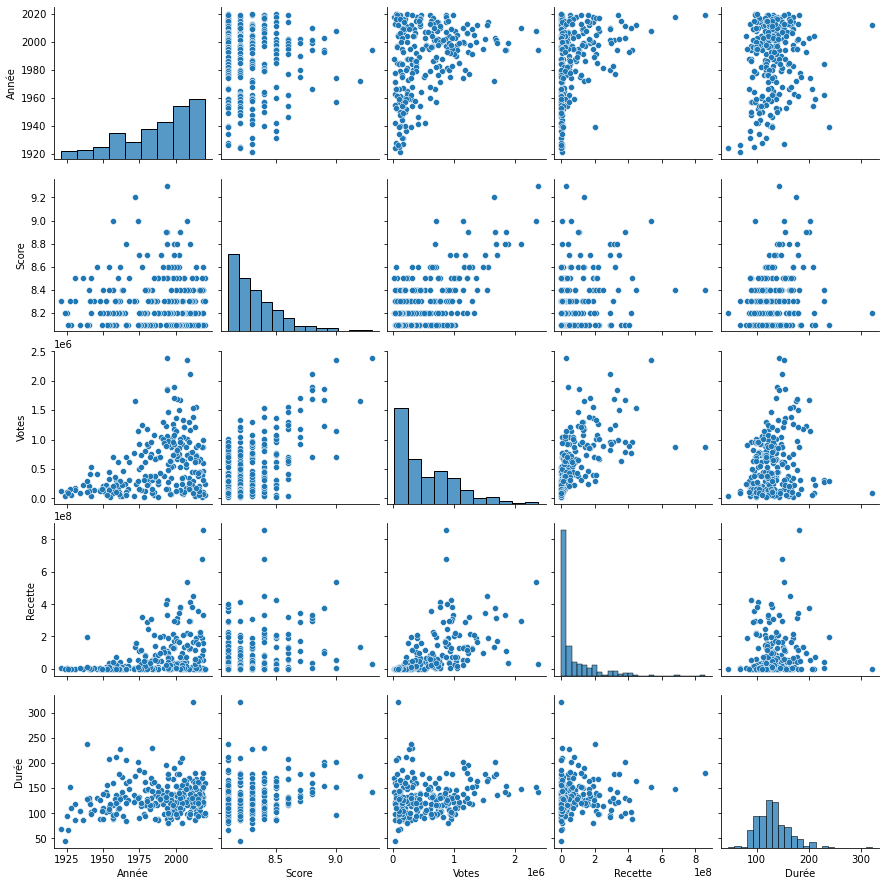

In [12]:
sns.pairplot(movies)

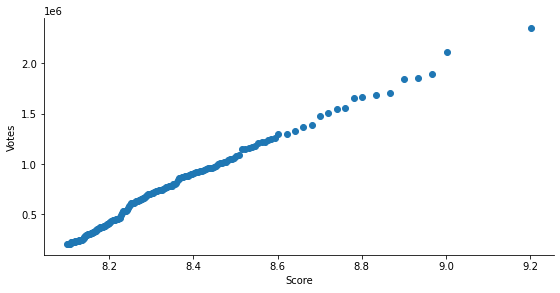

In [13]:
from seaborn_qqplot import pplot
pplot(movies, x="Score", y="Votes", kind='qq',height=4, aspect=2)

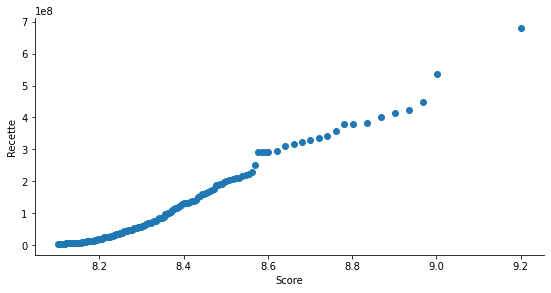

In [14]:
pplot(movies, x="Score", y="Recette", kind='qq',height=4, aspect=2)

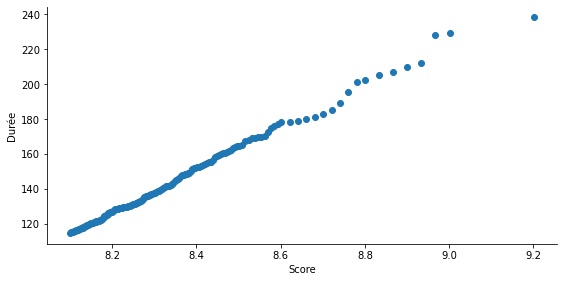

In [15]:
pplot(movies, x="Score", y="Durée", kind='qq',height=4, aspect=2)

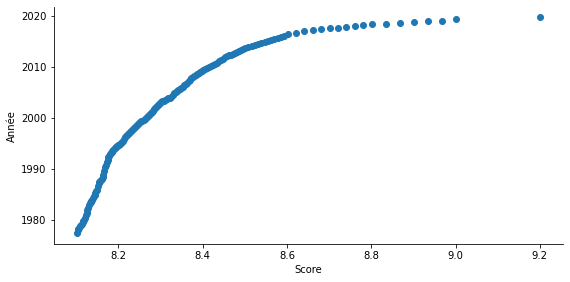

In [16]:
pplot(movies, x="Score", y="Année", kind='qq',height=4, aspect=2)

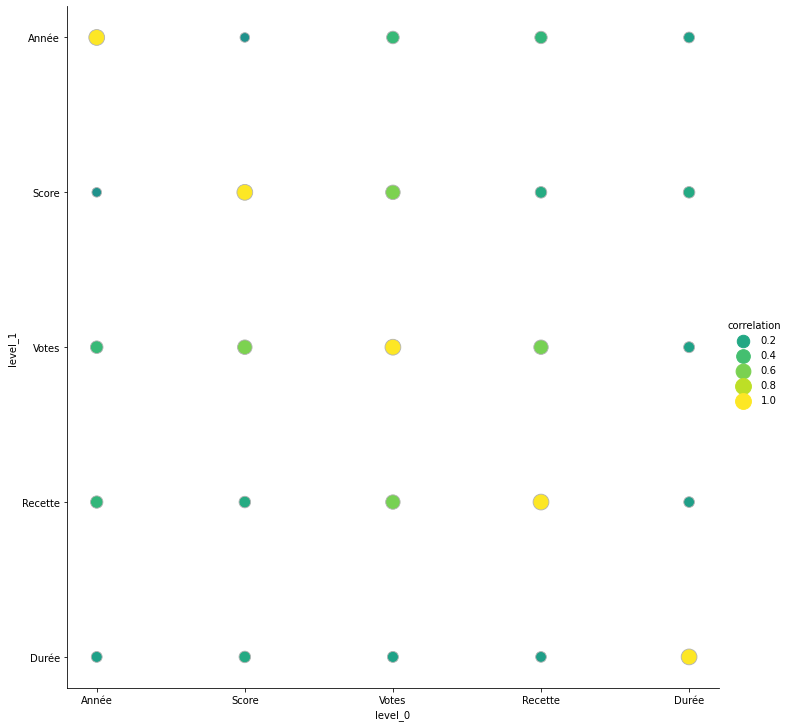

In [17]:
corr_mat = movies.corr().stack().reset_index(name="correlation")

g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="viridis", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

<AxesSubplot:>

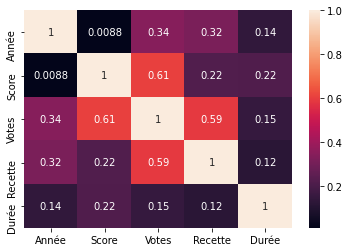

In [18]:
corr = movies.corr()
sns.heatmap(corr, annot=True)

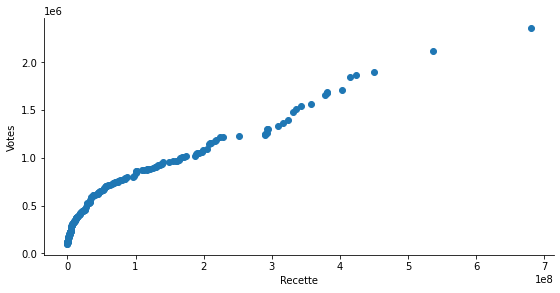

In [19]:
pplot(movies, x="Recette", y="Votes", kind='qq',height=4, aspect=2)